# Test Voice Activity Detection (VAD)

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
os.chdir('../..')
sys.path.insert(1, os.path.join(sys.path[0], '../..'))

In [2]:
import soundfile as sf
import IPython.display as ipd

file = 'data/voxceleb1/id10001/1zcIwhmdeo4/00001.wav'

audio, sr = sf.read(file, dtype='int16')

ipd.display(ipd.Audio(audio, rate=sr))

In [3]:
from VAD import VAD

vad = VAD(threshold=-20)

output = vad.apply(audio, sr)

In [4]:
import matplotlib.pyplot as plt

def plot_vad(data, titles, sr):
    plt.subplots(len(data), 1, figsize=(20, 10))
    plt.subplots_adjust(hspace=0.5)

    for i in range(len(data)):
        plt.subplot(len(data), 1, i + 1)
        y = data[i]
        x = [i / sr for i in range(0, len(y))]
        plt.plot(x, y)
        plt.gca().set_title(titles[i])

    plt.show()

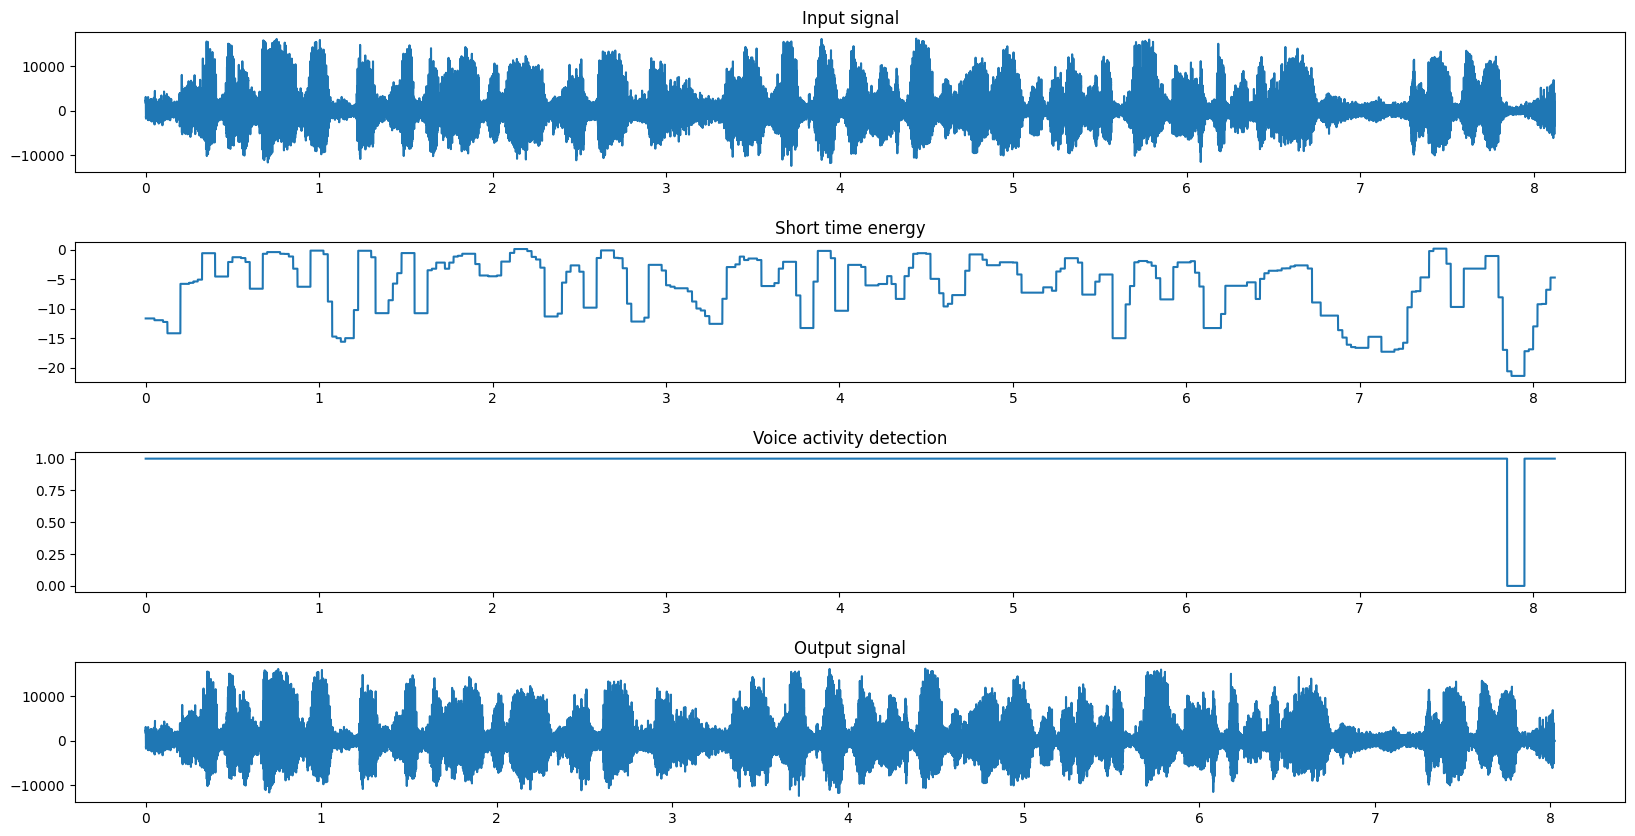

In [5]:
plot_vad(
    data=[audio, vad.last_energy, vad.last_vad, output],
    titles=[
        'Input signal',
        'Short time energy',
        'Voice activity detection',
        'Output signal'
    ],
    sr=sr
)

In [6]:
vad.last_vad.mean()

0.9876923076923076

In [7]:
audio.shape, output.shape

((129921,), (128400,))